# Análisis Exploratorio de Datos (EDA) de la tienda Aurelion

Etapas del EDA:
1. Definición del problema. ✅
2. Importación e inspección inicial de los datos:
    * Importación de datos.  ✅
    * Inspección de datos (estructura, dimensionalidad, primeras/últimas filas). ✅
    * Integración de datos. ✅
    * Cálculo de estadísticas descriptivas básicas. ✅
3. Limpieza y transformación de datos:
    * Corrección de tipos de datos. ✅
    * Tratamiento de datos ausentes. ✅
    * Tratamiento de inconsistencias de formato. ✅
    * Eliminación de duplicados. ✅
4. Tratamiento de datos atípicos. ✅
5. Análisis univariado (distribución y comportamiento de cada variable). ✅
6. Análisis bivariado (asociaciones y correlaciones).✅
7. Conclusiones.✅

## 1. Definición del problema

### Objetivo general.
* Analizar el comportamiento de las ventas, clientes y productos de la tienda Aurelion durante el período enero–junio 2024 para identificar patrones, impulsores de ingresos y oportunidades de mejora operativa, comercial y estratégica mediante técnicas de análisis descriptivo y bivariado.

### Objetivos específicos.
1. Identificar los principales factores que influyen en el importe total de las ventas. Evaluar la relación entre precio unitario, cantidad por ítem y el valor final de cada transacción. Cuantificar cuánto aporta cada variable a los ingresos y detectar patrones de compra.

2. Analizar la sensibilidad del cliente ante variaciones de precio. Examinar la relación entre precio y cantidad comprada para determinar si existe elasticidad o comportamiento inelástico. Segmentar clientes según su comportamiento frente al precio.

3. Evaluar el desempeño de las categorías de productos y su aporte a los ingresos. Comparar ingresos, precios y volumen de ventas entre las categorías “Alimentos” y “Limpieza”. Identificar productos de alta rotación y su contribución al negocio.

4. Determinar las diferencias en ventas según la ubicación geográfica. Analizar el volumen de ventas y los ingresos generados por cada ciudad. Detectar oportunidades de crecimiento y optimización de inventario por zona.

5. Examinar los patrones de uso de los métodos de pago. Identificar los medios de pago más utilizados por categoría y por ciudad.
Evaluar si existen oportunidades para mejorar la eficiencia operativa o incentivar métodos digitales.

6. Analizar la evolución temporal de las ventas y detectar patrones estacionales.
Revisar tendencias mensuales en los ingresos y detectar picos, caídas y ciclos de demanda.

## 2. Importación e inspección inicial de los datos:

### Importación de librerías y carga de datos

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ventas = pd.read_excel("./data/ventas.xlsx")
productos = pd.read_excel("./data/productos_corregidos.xlsx")
clientes = pd.read_excel("./data/clientes.xlsx")
detalle_ventas = pd.read_excel("./data/detalle_ventas.xlsx")

### Inspección inicial de los datos

#### Inspección de la tabla "detalle_ventas"

In [2]:
print(detalle_ventas.head(5))
print("-"*80)
print(detalle_ventas.info())
print("-"*80)
print(f"Shape of detalle_ventas: {detalle_ventas.shape}")

   id_venta  id_producto        nombre_producto  cantidad  precio_unitario  \
0         1           90    Toallas Húmedas x50         1             2902   
1         2           82  Aceitunas Negras 200g         5             2394   
2         2           39     Helado Vainilla 1L         5              469   
3         2           70           Fernet 750ml         2             4061   
4         2           22  Medialunas de Manteca         1             2069   

   importe  
0     2902  
1    11970  
2     2345  
3     8122  
4     2069  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_venta         343 non-null    int64 
 1   id_producto      343 non-null    int64 
 2   nombre_producto  343 non-null    object
 3   cantidad         343 non-null    int64

#### Inspección de la tabla "ventas"

In [3]:
print(ventas.head(5))
print("-"*80)
print(ventas.info())
print("-"*80)
print(f"Shape of ventas: {ventas.shape}")

   id_venta      fecha  id_cliente    nombre_cliente  \
0         1 2024-06-19          62  Guadalupe Romero   
1         2 2024-03-17          49      Olivia Gomez   
2         3 2024-01-13          20      Tomas Acosta   
3         4 2024-02-27          36    Martina Molina   
4         5 2024-06-11          56        Bruno Diaz   

                       email     medio_pago  
0  guadalupe.romero@mail.com        tarjeta  
1      olivia.gomez@mail.com             qr  
2      tomas.acosta@mail.com        tarjeta  
3    martina.molina@mail.com  transferencia  
4        bruno.diaz@mail.com        tarjeta  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_venta        120 non-null    int64         
 1   fecha           120 non-null    datetime6

#### Inspección de la tabla "productos"

In [4]:
print(productos.head(5))
print("-"*80)
print(productos.info())
print("-"*80)
print(f"Shape of productos: {productos.shape}")

   id_producto     nombre_producto  categoria  precio_unitario  \
0            1      Coca Cola 1.5L  Alimentos             2347   
1            2          Pepsi 1.5L   Limpieza             4973   
2            3         Sprite 1.5L  Alimentos             4964   
3            4  Fanta Naranja 1.5L   Limpieza             2033   
4            5  Agua Mineral 500ml  Alimentos             4777   

  categoria_corregida  
0           Alimentos  
1           Alimentos  
2           Alimentos  
3           Alimentos  
4           Alimentos  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_producto          100 non-null    int64 
 1   nombre_producto      100 non-null    object
 2   categoria            100 non-null    object
 3   precio_unitario      100 

#### Inspección de la tabla "clientes"

In [5]:
print(clientes.head(5))
print("-"*80)
print(clientes.info())
print("-"*80)
print(f"Shape of clientes: {clientes.shape}")

   id_cliente   nombre_cliente                     email      ciudad  \
0           1    Mariana Lopez    mariana.lopez@mail.com  Carlos Paz   
1           2    Nicolas Rojas    nicolas.rojas@mail.com  Carlos Paz   
2           3  Hernan Martinez  hernan.martinez@mail.com  Rio Cuarto   
3           4     Uma Martinez     uma.martinez@mail.com  Carlos Paz   
4           5  Agustina Flores  agustina.flores@mail.com     Cordoba   

  fecha_alta  
0 2023-01-01  
1 2023-01-02  
2 2023-01-03  
3 2023-01-04  
4 2023-01-05  
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      100 non-null    int64         
 1   nombre_cliente  100 non-null    object        
 2   email           100 non-null    object        
 3   ciudad          100 non-null

### Integración de datos

Con base en la inspección inicial de los datos, hemos concluido que es posible la unificación de los 4 dataframes bajo las siguientes premisas:
* Unir ventas y detalle_ventas en id_venta.
* Unir productos y detalle_ventas en id_producto.
* Unir clientes y ventas en id_cliente.
A continuación se muestra la unificación con base en nuestras observaciones:

In [6]:
df_unified = ventas.merge(detalle_ventas, on="id_venta", suffixes=("_ventas", "_dventas"))
df_unified = df_unified.merge(productos, on="id_producto", suffixes=("_dventas", "_producto"))
df_unified = df_unified.merge(clientes, on="id_cliente", suffixes=("_ventas", "_cliente"))

df_unified.head()

,id_venta,fecha,id_cliente,nombre_cliente_ventas,email_ventas,medio_pago,id_producto,nombre_producto_dventas,cantidad,precio_unitario_dventas,importe,nombre_producto_producto,categoria,precio_unitario_producto,categoria_corregida,nombre_cliente_cliente,email_cliente,ciudad,fecha_alta
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Toallas Húmedas x50,Limpieza,2902,Limpieza,Guadalupe Romero,guadalupe.romero@mail.com,Carlos Paz,2023-03-03
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Aceitunas Negras 200g,Limpieza,2394,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Helado Vainilla 1L,Alimentos,469,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Fernet 750ml,Limpieza,4061,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Medialunas de Manteca,Limpieza,2069,Alimentos,Olivia Gomez,olivia.gomez@mail.com,Rio Cuarto,2023-02-18


Podemos observar más a detalle los nombres de las columnas para eliminar aquellas que estén duplicadas.

In [7]:
df_unified.info()
print(f"Shape of df_unified: {df_unified.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_venta                  343 non-null    int64         
 1   fecha                     343 non-null    datetime64[ns]
 2   id_cliente                343 non-null    int64         
 3   nombre_cliente_ventas     343 non-null    object        
 4   email_ventas              343 non-null    object        
 5   medio_pago                343 non-null    object        
 6   id_producto               343 non-null    int64         
 7   nombre_producto_dventas   343 non-null    object        
 8   cantidad                  343 non-null    int64         
 9   precio_unitario_dventas   343 non-null    int64         
 10  importe                   343 non-null    int64         
 11  nombre_producto_producto  343 non-null    object        
 12  categoria             

Nótese que son 19 columnas en total y de ellas, se tienen duplicados de **nombre_cliente**, **email**, **nombre_producto** y **precio_unitario**. Procederemos a remover los duplicados.

In [8]:
df_unified = df_unified.T.drop_duplicates().T
df_unified.info()
print(f"Shape of df_unified: {df_unified.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id_venta                 343 non-null    object
 1   fecha                    343 non-null    object
 2   id_cliente               343 non-null    object
 3   nombre_cliente_ventas    343 non-null    object
 4   email_ventas             343 non-null    object
 5   medio_pago               343 non-null    object
 6   id_producto              343 non-null    object
 7   nombre_producto_dventas  343 non-null    object
 8   cantidad                 343 non-null    object
 9   precio_unitario_dventas  343 non-null    object
 10  importe                  343 non-null    object
 11  categoria                343 non-null    object
 12  categoria_corregida      343 non-null    object
 13  ciudad                   343 non-null    object
 14  fecha_alta               343 non-null    o

Ahora tenemos 15 columnas. Nótese también que al usar la transpuesta para eliminar columnas duplicadas, se han cambiado todos los tipos de datos a "object". Esto se corregirá en la siguiente estapa. Mientras procederemos a renombrar aquellas columnasque no fueron eliminadas.

In [9]:
df_unified = df_unified.rename(
    columns={
        "nombre_cliente_ventas": "nombre_cliente",
        "email_ventas": "email",
        "nombre_producto_dventas": "nombre_producto",
        "precio_unitario_dventas": "precio_unitario",
    }
)
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_venta             343 non-null    object
 1   fecha                343 non-null    object
 2   id_cliente           343 non-null    object
 3   nombre_cliente       343 non-null    object
 4   email                343 non-null    object
 5   medio_pago           343 non-null    object
 6   id_producto          343 non-null    object
 7   nombre_producto      343 non-null    object
 8   cantidad             343 non-null    object
 9   precio_unitario      343 non-null    object
 10  importe              343 non-null    object
 11  categoria            343 non-null    object
 12  categoria_corregida  343 non-null    object
 13  ciudad               343 non-null    object
 14  fecha_alta           343 non-null    object
dtypes: object(15)
memory usage: 40.3+ KB


### Cálculo de estadísticas descriptivas básicas

In [10]:
df_unified.describe(include='all')

C:\Users\motam\AppData\Local\Temp\ipykernel_2944\154445536.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_unified.describe(include='all')
C:\Users\motam\AppData\Local\Temp\ipykernel_2944\154445536.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_unified.describe(include='all')


,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,categoria_corregida,ciudad,fecha_alta
count,343,343,343,343,343,343,343,343,343,343,343,343,343,343,343
unique,120,93,67,64,67,4,95,95,5,94,249,2,2,6,67
top,2,2024-01-19 00:00:00,5,Agustina Flores,agustina.flores@mail.com,efectivo,18,Queso Rallado 150g,2,3444,4752,Limpieza,Alimentos,Rio Cuarto,2023-01-05 00:00:00
freq,5,10,15,15,15,111,9,9,83,9,4,178,286,104,15


## 3. Limpieza y transformación de datos

### Corrección de tipos de datos

Sabemos que en el proceso de integración de datos, los tipos de datos de las columnas del dataframe fueron cambiadas, por tanto, procederemos a esta corrección. Primero visualizaremos nuevamente nuestros datos.

In [11]:
df_unified.head(5)

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,categoria_corregida,ciudad,fecha_alta
0,1,2024-06-19 00:00:00,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,90,Toallas Húmedas x50,1,2902,2902,Limpieza,Limpieza,Carlos Paz,2023-03-03 00:00:00
1,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,82,Aceitunas Negras 200g,5,2394,11970,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00
2,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,39,Helado Vainilla 1L,5,469,2345,Alimentos,Alimentos,Rio Cuarto,2023-02-18 00:00:00
3,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,70,Fernet 750ml,2,4061,8122,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00
4,2,2024-03-17 00:00:00,49,Olivia Gomez,olivia.gomez@mail.com,qr,22,Medialunas de Manteca,1,2069,2069,Limpieza,Alimentos,Rio Cuarto,2023-02-18 00:00:00


Procederemos a la correción del tipo utilizando "astype":

In [12]:
df_unified = df_unified.astype(
    {
        "id_venta": "int",
        "fecha": "datetime64[ns]",
        "id_cliente": "int",
        "nombre_cliente": "string",
        "email": "string",
        "medio_pago": "string",
        "id_producto": "int",
        "nombre_producto": "string",
        "cantidad": "int",
        "precio_unitario": "float",
        "importe": "float",
        "categoria": "string",
        "categoria_corregida": "string",
        "ciudad": "string",
        "fecha_alta": "datetime64[ns]"
    }
)

Vamos a comprobar los cambios con dtypes:

In [13]:
df_unified.dtypes

id_venta                        int64
fecha                  datetime64[ns]
id_cliente                      int64
nombre_cliente         string[python]
email                  string[python]
medio_pago             string[python]
id_producto                     int64
nombre_producto        string[python]
cantidad                        int64
precio_unitario               float64
importe                       float64
categoria              string[python]
categoria_corregida    string[python]
ciudad                 string[python]
fecha_alta             datetime64[ns]
dtype: object

### Tratamiento de datos ausentes

Verificaremos si tenemos datos nulos en nuestro dataframe y la cantidad existente por columna.

In [14]:
# Tratamiento de datos ausentes
print("Valores nulos por columna:")
print(df_unified.isna().sum())

Valores nulos por columna:
id_venta               0
fecha                  0
id_cliente             0
nombre_cliente         0
email                  0
medio_pago             0
id_producto            0
nombre_producto        0
cantidad               0
precio_unitario        0
importe                0
categoria              0
categoria_corregida    0
ciudad                 0
fecha_alta             0
dtype: int64


Dado que no hay valores nulos en el dataframe, procederemos al siguiente paso.

### Tratamiento de inconsistencias de formato

Primero, echaremos un vistazo nuevamente al dataframe.

In [15]:
# Tratamiento de inconsistencias de formato
df_unified.tail(5)

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,categoria_corregida,ciudad,fecha_alta
338,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo,70,Fernet 750ml,2,4061.0,8122.0,Limpieza,Alimentos,Cordoba,2023-03-25
339,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo,93,Cepillo de Dientes,3,2142.0,6426.0,Alimentos,Limpieza,Cordoba,2023-03-25
340,118,2024-02-09,84,Pablo Sanchez,pablo.sanchez@mail.com,efectivo,50,Azúcar 1kg,2,727.0,1454.0,Limpieza,Alimentos,Cordoba,2023-03-25
341,119,2024-02-07,51,Agustina Gomez,agustina.gomez@mail.com,qr,45,Fideos Spaghetti 500g,5,745.0,3725.0,Alimentos,Alimentos,Rio Cuarto,2023-02-20
342,120,2024-04-21,72,Camila Rodriguez,camila.rodriguez@mail.com,tarjeta,20,Pan Lactal Blanco,5,1571.0,7855.0,Limpieza,Alimentos,Cordoba,2023-03-13


A simple vista los datos se alinean con lo que buscamos, incluyendo las fechas en el formato internacional ISO 8601. Por tanto, solo procederemos a cambiar el nombre de la columna "fecha" a "fecha_venta" para evitar confusiones con "fecha_alta", y a "fecha_alta" le añadiremos el sufijo "cliente" para tener un mejor descriptor de la columna.

In [16]:
df_unified = df_unified.rename(
    columns={
        "fecha": "fecha_venta",
        "fecha_alta": "fecha_alta_cliente"
    }
)
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_venta             343 non-null    int64         
 1   fecha_venta          343 non-null    datetime64[ns]
 2   id_cliente           343 non-null    int64         
 3   nombre_cliente       343 non-null    string        
 4   email                343 non-null    string        
 5   medio_pago           343 non-null    string        
 6   id_producto          343 non-null    int64         
 7   nombre_producto      343 non-null    string        
 8   cantidad             343 non-null    int64         
 9   precio_unitario      343 non-null    float64       
 10  importe              343 non-null    float64       
 11  categoria            343 non-null    string        
 12  categoria_corregida  343 non-null    string        
 13  ciudad               343 non-null  

De igual forma, se procede a eliminar "categoría" y renombrar "categoría_corregida", dado el proceso que se le aplicó en el sprint 1.

In [17]:
df_unified = df_unified.drop(columns=["categoria"])
df_unified = df_unified.rename(columns={"categoria_corregida": "categoria"})
df_unified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_venta            343 non-null    int64         
 1   fecha_venta         343 non-null    datetime64[ns]
 2   id_cliente          343 non-null    int64         
 3   nombre_cliente      343 non-null    string        
 4   email               343 non-null    string        
 5   medio_pago          343 non-null    string        
 6   id_producto         343 non-null    int64         
 7   nombre_producto     343 non-null    string        
 8   cantidad            343 non-null    int64         
 9   precio_unitario     343 non-null    float64       
 10  importe             343 non-null    float64       
 11  categoria           343 non-null    string        
 12  ciudad              343 non-null    string        
 13  fecha_alta_cliente  343 non-null    datetime64[ns]

### Eliminación de duplicados

Ahora procederemos a eliminar filas duplicadas.

In [18]:
print(f"Duplicados antes: {df_unified.duplicated().sum()}")
df_unified = df_unified.drop_duplicates()
print(f"Duplicados después: {df_unified.duplicated().sum()}")
print(f"Total de filas: {df_unified.shape[0]}")

Duplicados antes: 0
Duplicados después: 0
Total de filas: 343


Se puede observar que no teníamos duplicados en el dataframe.

# 4. Tratamiento de datos atípicos

Dada la naturaleza de nuestros datos, las columnas de tipo string y datetime serán descartadas para este paso, pues solo son indicios de la variablidad de nuestros datos y representación de la frecuencia de compra de un cliente. De igual forma, las columnas que corresponden a id's serán descartadas. Solo consideraremos a las siguientes columnas para el análisis:
* cantidad.
* precio_unitario.      
* importe.

Columna: cantidad | Outliers: 0


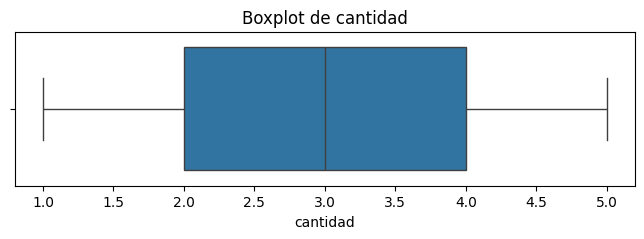

Columna: importe | Outliers: 7


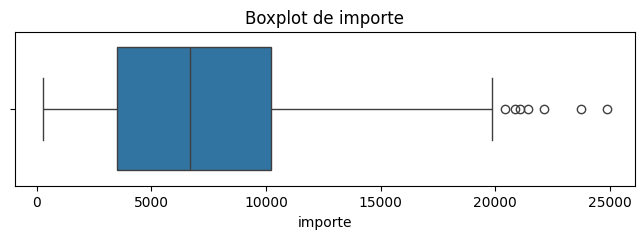

Columna: precio_unitario | Outliers: 0


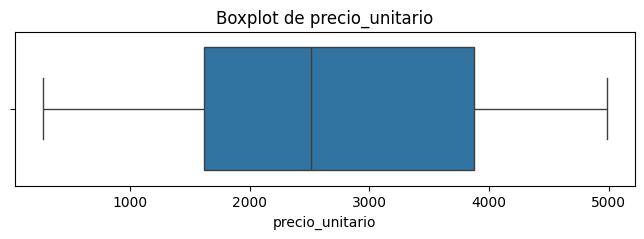

In [19]:
# Análisis y tratamiento de datos atípicos en las columnas seleccionadas.
columnas_analisis = {"cantidad", "precio_unitario", "importe"}
outliers_dict = {}
# Gráfico y conteo de outliers por columna.
for col in columnas_analisis:
    Q1 = df_unified[col].quantile(0.25)
    Q3 = df_unified[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df_unified[(df_unified[col] < limite_inferior) | (df_unified[col] > limite_superior)]
    outliers_dict[col] = outliers.shape[0]
    print(f"Columna: {col} | Outliers: {outliers.shape[0]}")
    # Visualización
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df_unified[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

Nótamos que la única columa con Outliers es la de "importe". Vamos a realizar un análisis más al respecto.

In [20]:
df_unified[df_unified["importe"] > 20000]

,id_venta,fecha_venta,id_cliente,nombre_cliente,email,medio_pago,id_producto,nombre_producto,cantidad,precio_unitario,importe,categoria,ciudad,fecha_alta_cliente
41,16,2024-04-12,2,Nicolas Rojas,nicolas.rojas@mail.com,efectivo,35,Barrita de Cereal 30g,5,4430.0,22150.0,Alimentos,Carlos Paz,2023-01-02
54,21,2024-06-19,10,Karina Acosta,karina.acosta@mail.com,transferencia,76,Pizza Congelada Muzzarella,5,4286.0,21430.0,Alimentos,Cordoba,2023-01-10
141,50,2024-01-09,8,Bruno Castro,bruno.castro@mail.com,transferencia,58,Caramelos Masticables,5,4752.0,23760.0,Alimentos,Carlos Paz,2023-01-08
175,63,2024-06-19,25,Karina Castro,karina.castro@mail.com,tarjeta,8,Energética Nitro 500ml,5,4218.0,21090.0,Alimentos,Rio Cuarto,2023-01-25
208,75,2024-05-23,61,Guadalupe Martinez,guadalupe.martinez@mail.com,qr,2,Pepsi 1.5L,5,4973.0,24865.0,Alimentos,Rio Cuarto,2023-03-02
260,94,2024-03-06,41,Elena Rodriguez,elena.rodriguez2@mail.com,qr,86,Jugo en Polvo Limón,5,4090.0,20450.0,Alimentos,Alta Gracia,2023-02-10
308,110,2024-05-19,92,Mariana Rodriguez,mariana.rodriguez@mail.com,efectivo,6,Jugo de Naranja 1L,5,4170.0,20850.0,Alimentos,Alta Gracia,2023-04-02


Dado lo anterior, podemos concluir que el hecho de que el valor de importe de los Outliers sea alto es consecuencia directa de la cantidad de productos comprados por el cliente, y que todos estos valores son resultado de la multiplicación de las columnas "precio_unitario" y "cantidad". Por tanto, los Outliers no son ningún error y vale la pena preservarlos para los análisis posteriores.

Por último, obtendremos nuevamente las estadísticas descriptivas y exportaremos el dataframe limpio a un formato CSV.

In [21]:
print(df_unified.describe())
df_unified.to_csv("./data/df_unified_clean.csv", index=False)

         id_venta                    fecha_venta  id_cliente  id_producto  \
count  343.000000                            343  343.000000   343.000000   
mean    61.492711  2024-03-30 14:12:14.693877504   45.539359    49.139942   
min      1.000000            2024-01-02 00:00:00    1.000000     1.000000   
25%     31.000000            2024-02-10 12:00:00   20.000000    23.000000   
50%     61.000000            2024-03-26 00:00:00   43.000000    47.000000   
75%     93.000000            2024-05-21 00:00:00   67.000000    76.000000   
max    120.000000            2024-06-28 00:00:00  100.000000   100.000000   
std     34.835525                            NaN   28.436922    29.135461   

         cantidad  precio_unitario       importe  \
count  343.000000       343.000000    343.000000   
mean     2.962099      2654.495627   7730.078717   
min      1.000000       272.000000    272.000000   
25%      2.000000      1618.500000   3489.000000   
50%      3.000000      2512.000000   6702.0000

# 5. Análisis univariado

Para esta etapa, dividiremos el análisis en 3 partes de acuerdo con el tipo de variable:
* Análisis de variables numéricas.
* Análisis de variables categóricas.
* Análisis de variables de fechas.

Las variables de identificación únicas (id_venta, id_producto y id_cliente) no las tomaremos en cuenta para este análisis, dado que no son variables numéricas ni categóricas con significado analítico (solo sirven para identificar).

## Análisis de variables numéricas

📈 Variable: precio_unitario


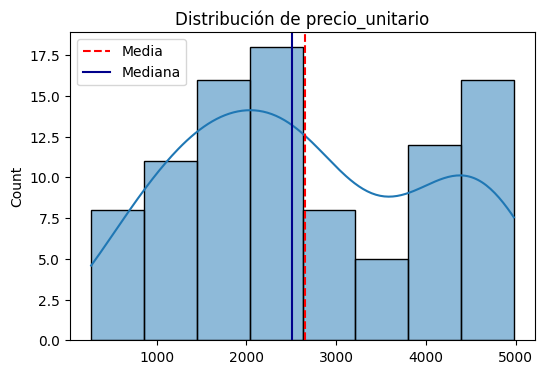

Min: 272.0, Max: 4982.0, Media: 2654.4956268221576, Mediana: 2512.0, Std: 1308.694720167715

Distribución sesgada a la derecha (valores altos poco frecuentes).

📈 Variable: importe


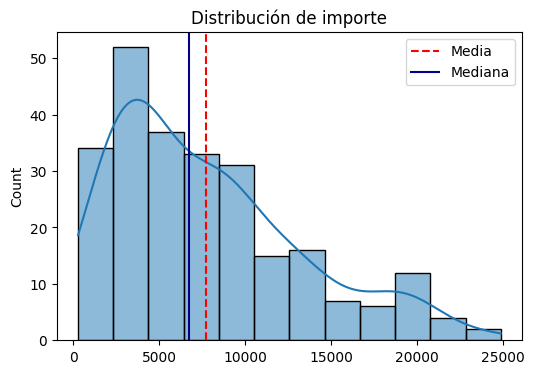

Min: 272.0, Max: 24865.0, Media: 7730.078717201166, Mediana: 6702.0, Std: 5265.543076592035

Distribución sesgada a la derecha (valores altos poco frecuentes).



In [74]:

for col in ["precio_unitario", "importe"]:
    print(f"📈 Variable: {col}")
    # Estadísticas descriptivas
    desc = df_unified[col].describe()
    # Obtención de media y mediana.
    mean, median = desc["mean"], desc["50%"]

    # Histograma
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df_unified[col].dropna().unique(), kde=True, ax=ax)
    ax.axvline(mean, color='r', linestyle='--', label='Media')
    ax.axvline(median, color='darkblue', linestyle='-', label='Mediana')
    ax.set_title(f"Distribución de {col}")
    plt.legend()
    plt.show()
    print(f"Min: {desc['min']}, Max: {desc['max']}, Media: {desc['mean']}, Mediana: {desc['50%']}, Std: {desc['std']}\n")

    # Interpretación de sesgo.
    if mean > median:
        interpretacion = "Distribución sesgada a la derecha (valores altos poco frecuentes)."
    elif mean < median:
        interpretacion = "Distribución sesgada a la izquierda (valores bajos poco frecuentes)."
    else:
        interpretacion = "Distribución aproximadamente simétrica."
    print(f"{interpretacion}\n")

Dados los gráficos anteriores, hemos notado lo siguiente:
* precio_unitario: Los precios de los productos parecen tener una distribución bimodal (dos picos), uno alrededor de \$1500-\$2000 y otro cerca de \$4000.

* importe: El importe (calculado como cantidad * precio_unitario) muestra una ligera asimetría positiva (cola derecha), lo que es normal. La mayoría de los importes por ítem están por debajo de \$10,000, aunque algunos llegan hasta casi \$25,000.

Dado que la columna "cantidad" solo tiene 5 valores posibles, se ha tomado la decisión de realizar un gráfico de barras para su análisis.

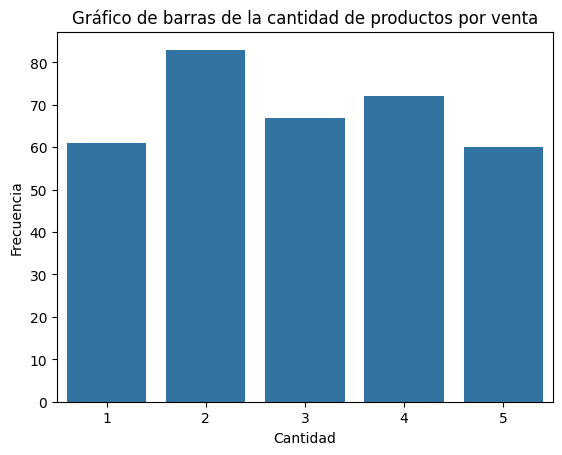

In [90]:
sns.barplot(x=df_unified["cantidad"].value_counts().index, y=df_unified["cantidad"].value_counts().values)
plt.ylabel("Frecuencia")
plt.xlabel("Cantidad")
plt.title("Gráfico de barras de la cantidad de productos por venta")
plt.show()

Se puede observar que los clientes suelen llevar entre 2 y 4 productos por ítem de venta, siendo 2 la cantidad más frecuente.

## Análisis de variables categóricas

Realizaremos el análisis de las columnas de "categoria", "medio_pago" y "ciudad" para todos sus valores posibles.

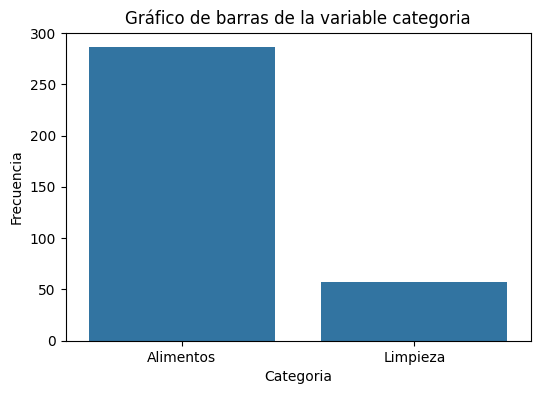

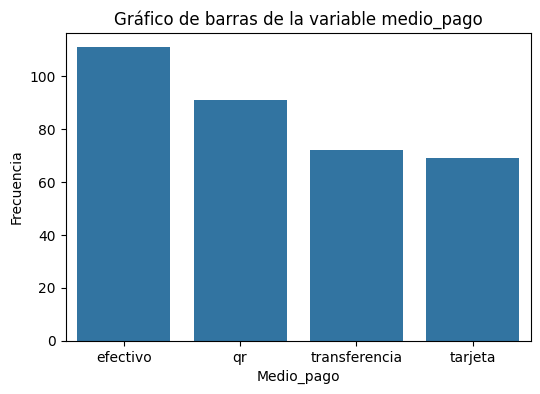

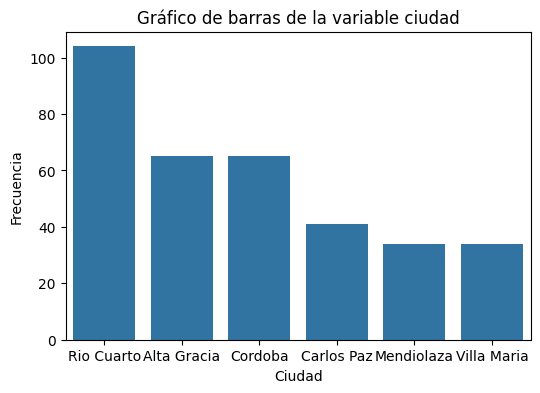

In [89]:
for col in ["categoria", "medio_pago", "ciudad"]:
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x=df_unified[col].value_counts().index, y=df_unified[col].value_counts().values)
    plt.ylabel("Frecuencia")
    plt.xlabel(col.capitalize())
    plt.title(f"Gráfico de barras de la variable {col}")
    plt.show()

Dados los gráficos anteriores hemos notado lo siguiente:
* categoria: Existe un claro dominio de la categoría "Alimentos", que representa 286 de las 343 ventas de ítems, frente a 57 de "Limpieza".
* medio_pago: El medio de pago más utilizado es el "efectivo" (111 transacciones), seguido de cerca por "qr" (91). Los valores de "transferencia" (72) y "tarjeta" (69) son menos comunes.
* ciudad: Las ventas están más concentradas en "Rio Cuarto" (104 ventas), con una presencia significativa en "Alta Gracia" (65) y "Cordoba" (65).

Dada la alta cantidad de valores que pueden tener las columnas de nombre_cliente y nombre_producto, tomaremos solo el top 5 de cada una y el resto lo clasificaremos como "Otros".

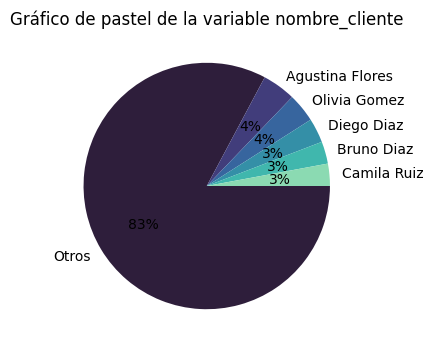

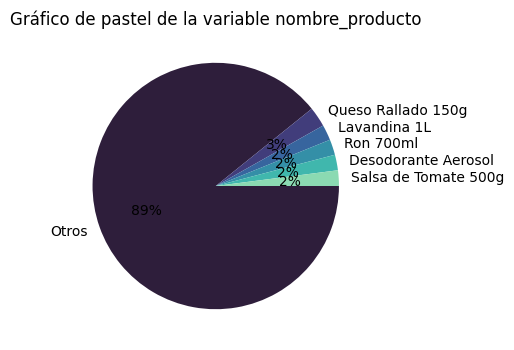

In [77]:
for col in ["nombre_cliente", "nombre_producto"]:
    # Obtiene el top 5 de valores más frecuentes.
    top = df_unified[col].value_counts().head(5)
    # Agrupa los demás valores como "Otros".
    grouped_values = df_unified[col].apply(lambda x: x if x in top.index else 'Otros')
    
    fig, ax = plt.subplots(figsize=(6, 4))
    colors = sns.color_palette('mako') 
    plt.pie(grouped_values.value_counts().values, labels=grouped_values.value_counts().index, colors=colors, autopct='%.0f%%', counterclock=False)
    plt.title(f"Gráfico de pastel de la variable {col}")
    plt.show()
    

Dados los gráficos anteriores hemos notado lo siguiente:
* nombre_cliente: "Agustina Flores" es la cliente con más compras, impactando en un 4% de las ventas. Le sigue "Olivia Gómez" con el mismo porcentaje, mientras que "Diego Diaz", "Bruno Diaz" y "Camila Ruiz" han empatado con un 3% de las ventas.
* nombre_producto: El producto más vendido es el "Queso Rallado 150g" con un 3%, seguido por un empate de varios productos como "Salsa de Tomate", "Desodorante", "Ron" y "Lavandina" con un 2% en cada caso.

## Análisis de variables de fecha

Realizaremos gráficos de líneas para analizar el comportamiento de las variables de fecha.

📈 Variable: fecha_venta
Fechas válidas: 343 registros.


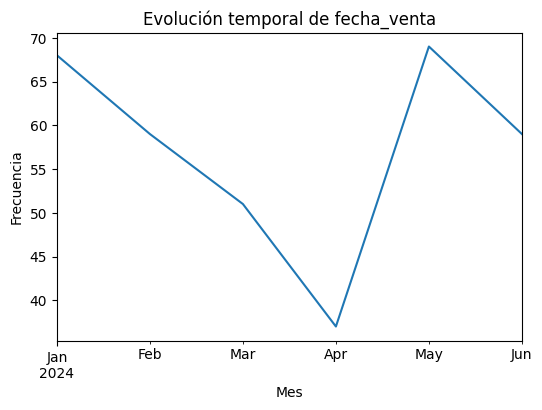

📈 Variable: fecha_alta_cliente
Fechas válidas: 343 registros.


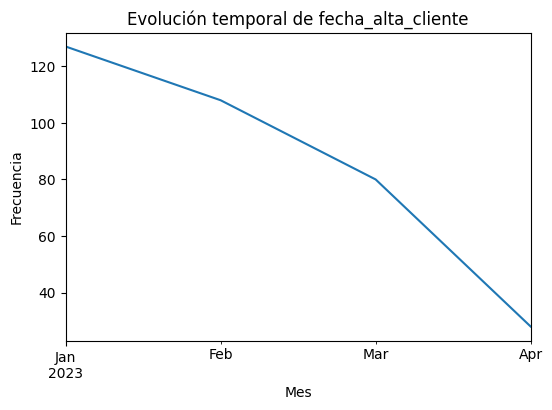

In [78]:
for col in ["fecha_venta", "fecha_alta_cliente"]:
    print(f"📈 Variable: {col}")
    df_fecha = pd.to_datetime(df_unified[col].dropna())
    if df_fecha.empty:
        print(f"⚠️ No hay datos válidos de fecha en {col}.\n")
        continue

    df_mes = df_fecha.dt.to_period("M").value_counts().sort_index()
    print(f"Fechas válidas: {len(df_fecha)} registros.")

    # Línea de tiempo mensual
    fig, ax = plt.subplots(figsize=(6, 4))
    df_mes.plot(ax=ax)
    ax.set_title(f"Evolución temporal de {col}")
    ax.set_xlabel("Mes")
    ax.set_ylabel("Frecuencia")
    plt.show()

Dados los gráficos anteriores hemos notado lo siguiente:
* fecha_venta: Las ventas en el conjunto de datos cubren desde el 2 de enero de 2024 hasta el 28 de junio de 2024. El gráfico muestra una alta cantidad de ventas en Enero y Mayo, donde en este último se registra el máximo de ventas. Por otro lado, se registra en Abril una gran caída de las ventas.

* fecha_alta_cliente: Los clientes en este conjunto de datos fueron dados de alta entre el 1 de enero de 2023 y el 10 de abril de 2023. Se nota que el máximo de registros realizados fue en Enero y conforme avanzó el año 2023 la cantidad de registros disminuyó progresivamente.

# 6. Análisis bivariado

Empezaremos realizando la matriz de correlación de las variables numéricas. Para ello, primero haremos un filtro de estod tipos.

In [79]:
df_numeric = df_unified.select_dtypes(include=["int64", "float64"])

Procedemos a calcular la matriz de correlación.

In [80]:
corr_matrix = df_numeric.corr(method='pearson')
print("📊 MATRIZ DE CORRELACIÓN (coeficientes de Pearson):\n")
print(corr_matrix.round(3))

📊 MATRIZ DE CORRELACIÓN (coeficientes de Pearson):

                 id_venta  id_cliente  id_producto  cantidad  precio_unitario  \
id_venta            1.000      -0.039       -0.042     0.038           -0.095   
id_cliente         -0.039       1.000        0.034     0.010           -0.055   
id_producto        -0.042       0.034        1.000     0.076            0.002   
cantidad            0.038       0.010        0.076     1.000           -0.074   
precio_unitario    -0.095      -0.055        0.002    -0.074            1.000   
importe            -0.063      -0.025        0.049     0.600            0.679   

                 importe  
id_venta          -0.063  
id_cliente        -0.025  
id_producto        0.049  
cantidad           0.600  
precio_unitario    0.679  
importe            1.000  


Para poder visualizar mejor los valores obtenidos, se procede a realizar un mapa de calor.

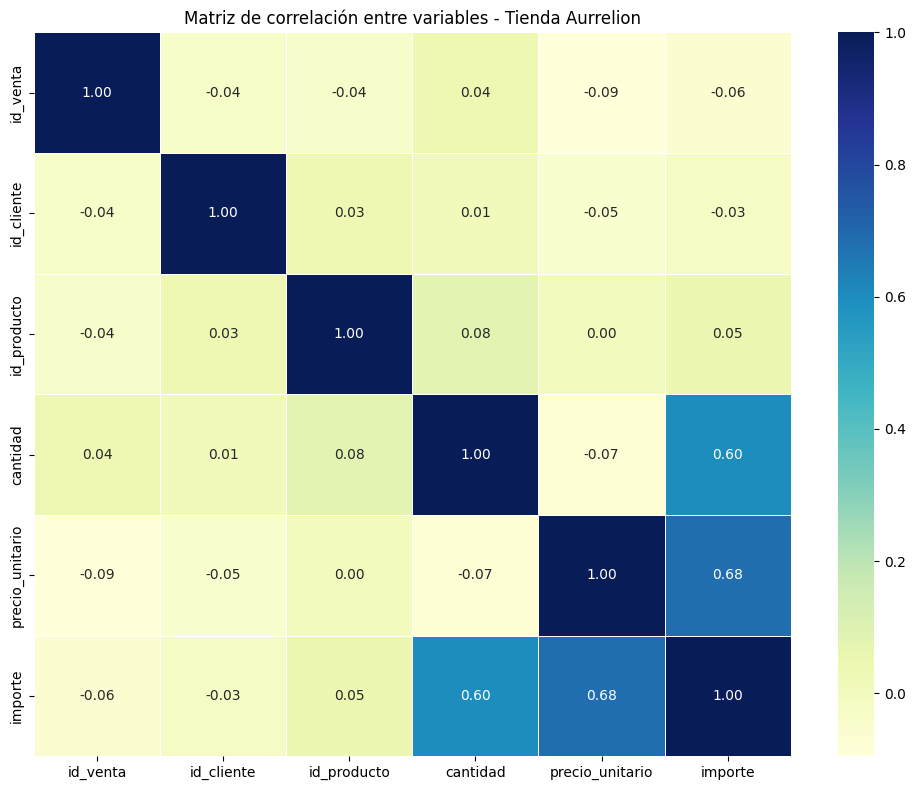

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables - Tienda Aurrelion")
plt.tight_layout()
plt.show()

Dada la naturaleza de los datos, se realiza el análisis de la correlación entre las variables de "cantidad", "precio_unitario" e "importe".

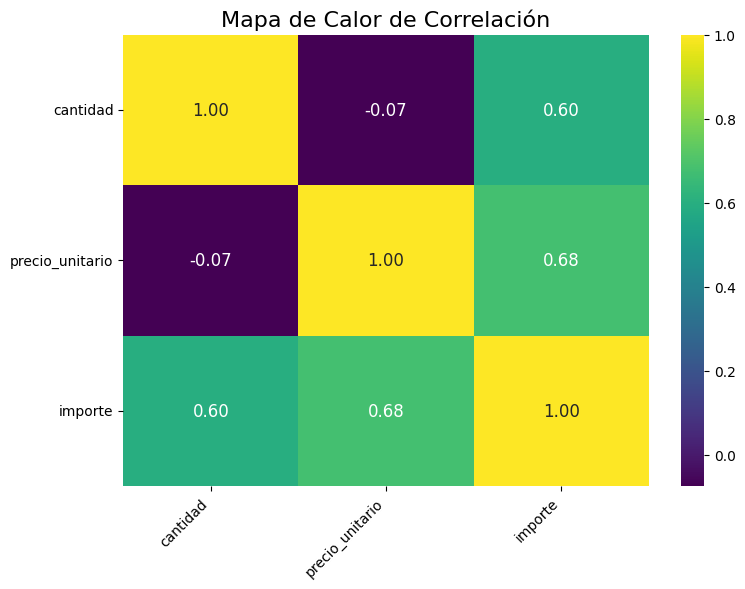

<Figure size 640x480 with 0 Axes>

In [91]:
numeric_cols = ['cantidad', 'precio_unitario', 'importe'] 
corr_matrix = df_unified[numeric_cols].corr() 
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=True, 
annot_kws={"size": 12}) 
plt.title('Mapa de Calor de Correlación', fontsize=16) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(rotation=0, fontsize=10) 
plt.tight_layout() 
plt.show()
plt.clf() # Limpiar la figura actual 

Dado el gráfico anterior, se observan los siguientes hallazgos: 
* Existe una correlación positiva moderada ($r = 0.60$) entre cantidad e importe. Esto confirma que el volumen de artículos por transacción es el principal impulsor del ingreso total. 
* La correlación entre precio_unitario e importe es positiva moderada ($r = 0.68$). Esto es consecuencia de la fórmula aplicada para calcular el importe (importe = precio_unitario x cantidad).
* Existe una correlación negativa débil ($r = -0.07$) entre el precio_unitario y la cantidad comprada. Los clientes compran más unidades de productos más baratos.

Ahora se procederá a realizar un análisis del importe (ingresos totales) de acuerdo a la categoría del producto.

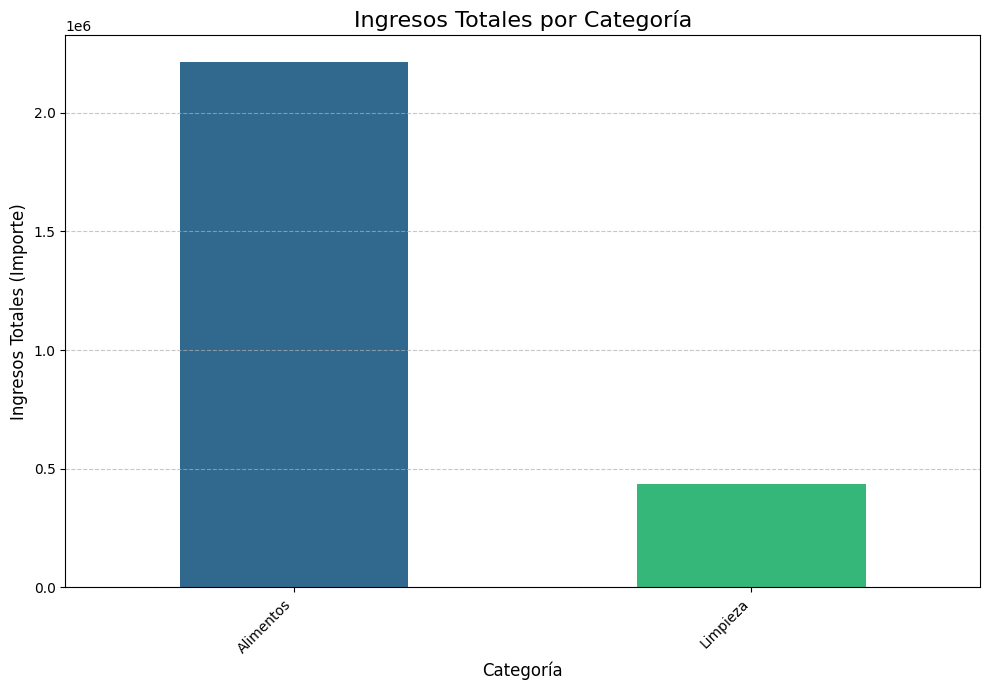

<Figure size 640x480 with 0 Axes>

In [83]:
ventas_por_categoria = df_unified.groupby('categoria')['importe'].sum().sort_values(ascending=False) 
plt.figure(figsize=(10, 7)) 
colors_cat = sns.color_palette('viridis', len(ventas_por_categoria)) 
ventas_por_categoria.plot(kind='bar', color=colors_cat) 
plt.title('Ingresos Totales por Categoría', fontsize=16) 
plt.ylabel('Ingresos Totales (Importe)', fontsize=12) 
plt.xlabel('Categoría', fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()
plt.clf() 

Se observa el siguiente hallazgo:
* La categoría "Alimentos" es la que genera, con diferencia, el mayor volumen de ingresos totales para el negocio. Esto sugiere que se tiene una oportunidad de diversificación para productos de "Limpieza" con el objetivo de incrementar los ingresos de esta categoría. 

Ahora se procederá a realizar un análisis de los ingresos totales por ciudad.

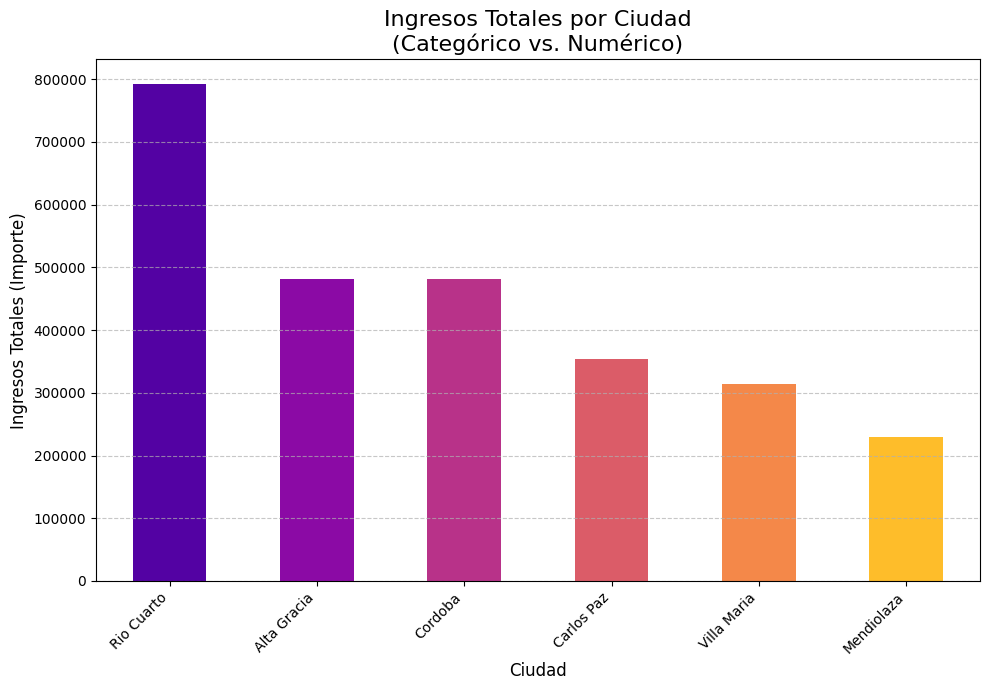

<Figure size 640x480 with 0 Axes>

In [84]:
ventas_por_ciudad = df_unified.groupby('ciudad')['importe'].sum().sort_values(ascending=False) 
plt.figure(figsize=(10, 7)) 
colors_city = sns.color_palette('plasma', len(ventas_por_ciudad)) 
ventas_por_ciudad.plot(kind='bar', color=colors_city) 
plt.title('Ingresos Totales por Ciudad\n(Categórico vs. Numérico)', fontsize=16) 
plt.ylabel('Ingresos Totales (Importe)', fontsize=12) 
plt.xlabel('Ciudad', fontsize=12) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()
plt.clf() 

De acuerdo a la información presentada en la base de datos, se observa que todas las ciudades corresponden a distintas sucursales de la tienda Aurelion en Argentina. De acuerdo con el gráfico, se tiene que:
* "Rio Cuarto" es la ciudad que reporta el mayor volumen de ingresos totales. 
* "Cordoba" y "Altagracia" muestran niveles de ingresos muy similares entre sí, mientras que "Mendiolaza" es la de menor rendimiento. 

Para continuar con este análisis por ciudad, se procederá a realizar un gráfico que tomará en cuenta los medios de pago utilizados.

<Figure size 1200x800 with 0 Axes>

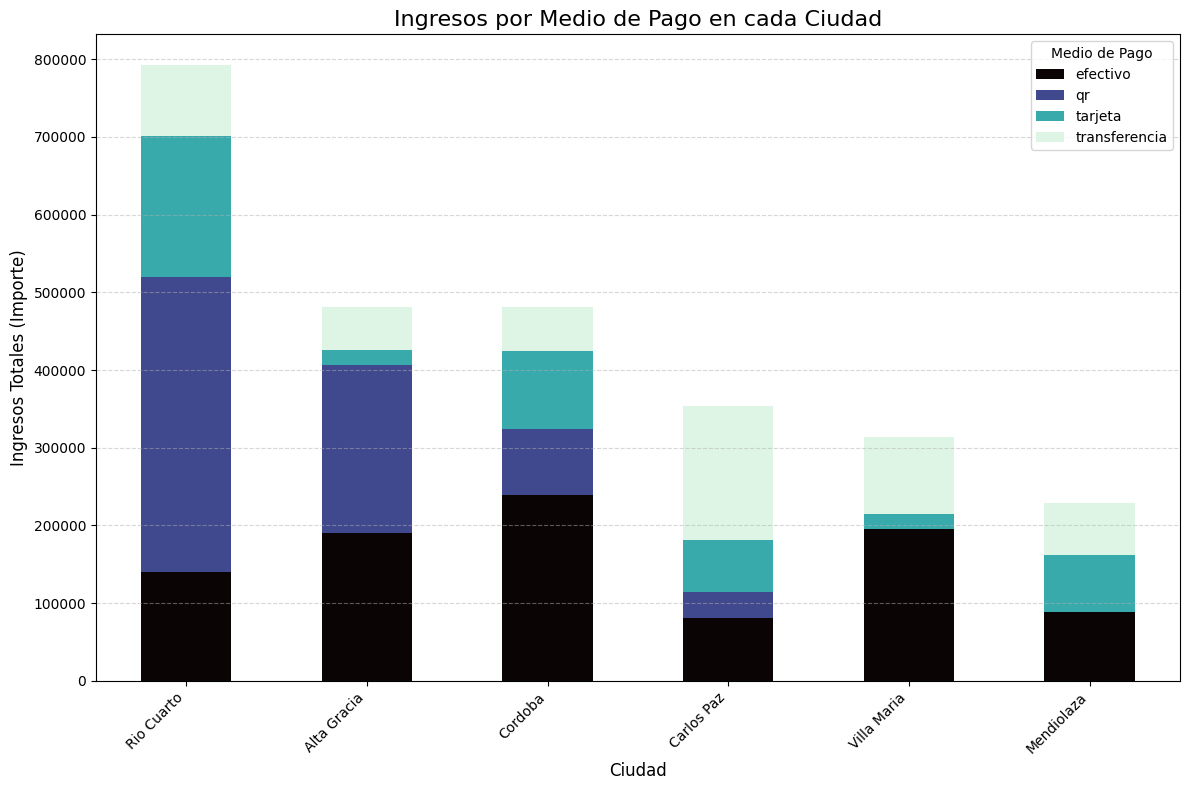

<Figure size 640x480 with 0 Axes>

In [85]:
# Crear tabla de contingencia: Ciudad vs Medio de Pago (suma del importe)
tabla_ciudad_pago = pd.crosstab(df_unified['ciudad'], df_unified['medio_pago'],
                                values=df_unified['importe'], aggfunc='sum').fillna(0)

# Ordenar por total de ingresos en cada ciudad (descendente)
tabla_ciudad_pago = tabla_ciudad_pago.loc[tabla_ciudad_pago.sum(axis=1).sort_values(ascending=False).index]

# Gráfico de barras apiladas
plt.figure(figsize=(12, 8))

tabla_ciudad_pago.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='mako'  # mantiene coherencia con tu estilo
)

plt.title('Ingresos por Medio de Pago en cada Ciudad', fontsize=16)
plt.ylabel('Ingresos Totales (Importe)', fontsize=12)
plt.xlabel('Ciudad', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Medio de Pago', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.clf()

De acuerdo con el gráfico anterior, se observa los siguiente:
* El método de pago más común es "Efectivo" dado que a pesar de no ser el más frecuente, está presente en todas las ciudades. 
* Adicionalmente, se observa que en las dos ciudades con mayores ingresos (Río Cuarto y Alta Gracia) el método de pago más utilizado es el "QR". Mientras que en las 2 ciudades con menor ingreso, la presencia del "QR" es prácticamente nula.
* En todas las ciudades se observa que se utiliza "Transferencia" y "Tarjeta", pero no con tanta regularidad como los demás métodos de pago.
* Esto coincide con el hallazgo encontrado en el análisis univariado de "método_pago", en el cual el método de pago más utilizado es "Efectivo".

Para continuar con el análisis del medio de pago, se procederá a realizar un gráfico que lo compara con la categoría del producto.

<Figure size 1200x800 with 0 Axes>

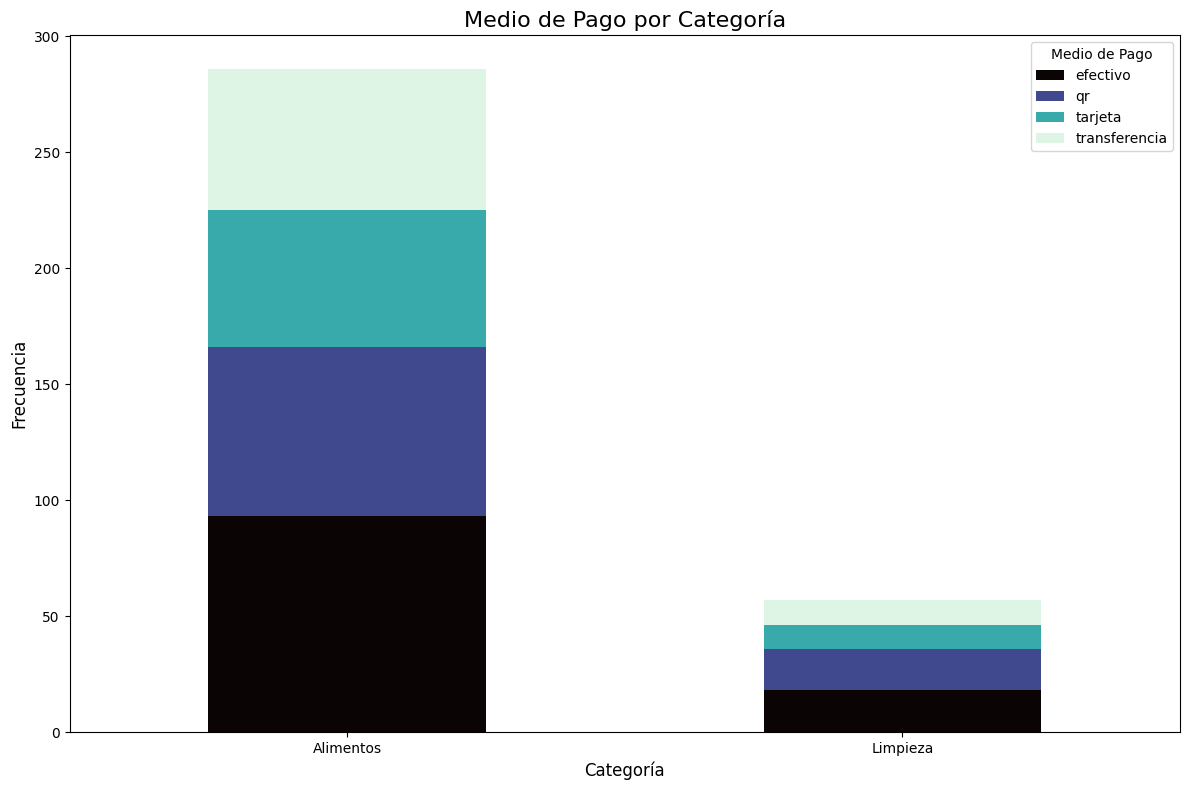

<Figure size 640x480 with 0 Axes>

In [86]:
# Crear tabla de contingencia
contingency_table = pd.crosstab(df_unified['categoria'], df_unified['medio_pago'])

plt.figure(figsize=(12, 8))

contingency_table.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='mako' 
)

plt.title('Medio de Pago por Categoría', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Categoría', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Medio de Pago', fontsize=10)
plt.tight_layout()
plt.show()
plt.clf()

De acuerdo con el gráfico anterior, se encontró lo siguiente. 
* El método de pago utilizado con mayor frecuencia es el "Efectivo", seguido del "QR". Mientras que los métodos utilizados con menor frecuencia en menor proporción son "Tarjeta" y "Transferencia".
* Se observa mucho mejor lo encontrado en el análisis univariado para "método_pago".

A continuación, se muestra la evolución de los ingresos totales por mes en el año 2024.

C:\Users\motam\AppData\Local\Temp\ipykernel_2944\1401058891.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df_time['importe'].resample('M').sum()


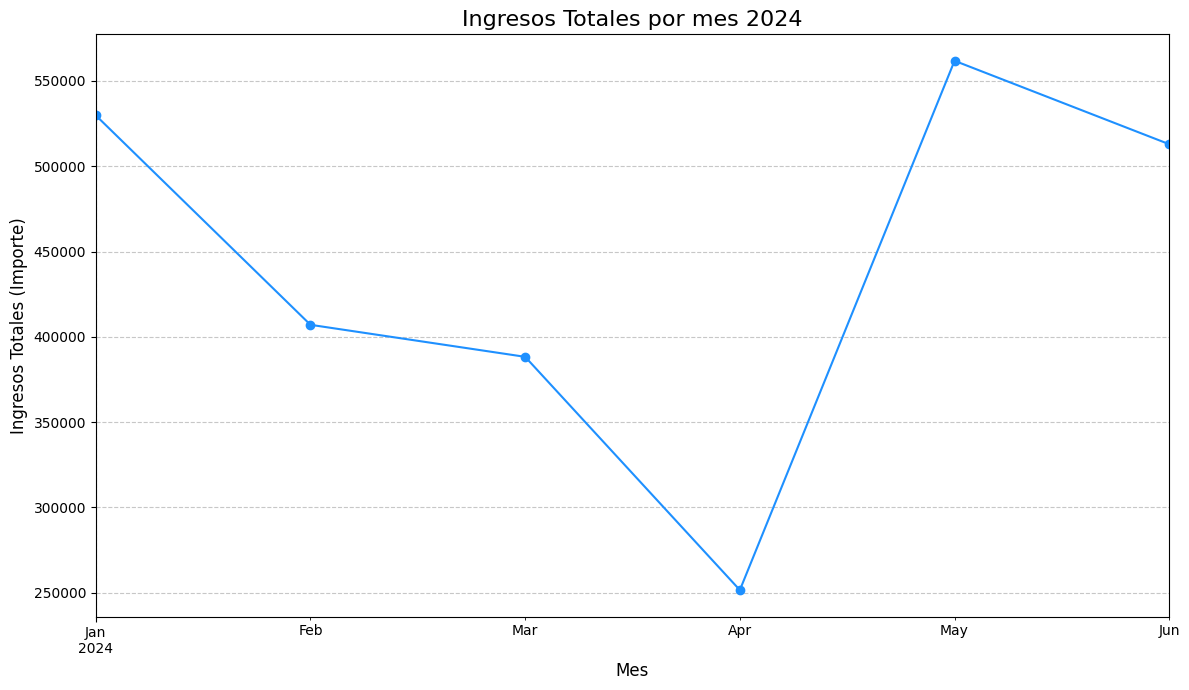

<Figure size 640x480 with 0 Axes>

In [87]:
# Asegurarse de que fecha_venta es el índice para remuestrear 
df_time = df_unified.set_index('fecha_venta') 
# Remuestrear por mes ('M') y sumar los importes 
ventas_mensuales = df_time['importe'].resample('M').sum() 
plt.figure(figsize=(12, 7)) 
ventas_mensuales.plot(kind='line', marker='o', linestyle='-', color='dodgerblue') 
plt.title('Ingresos Totales por mes 2024', fontsize=16) 
plt.ylabel('Ingresos Totales (Importe)', fontsize=12) 
plt.xlabel('Mes', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()
plt.clf() 

Se observa una clara tendencia en el aumento de los ingresos en el mes de Enero del 2024 y una fuerte caída en Abril. Al siguiente mes (Mayo), se observa una gran recuperación de los ingresos (y el pico más alto). Esto indica una estacionalidad de los ingresos de acuerdo con una temporada alta en los meses de Enero y Mayo, y una temporada baja en Abril.

Próximamente, se realizará una predicción con los datos del año 2024 para el año 2025, con la intención de comprender la estacionalidad de las ventas y posibles oportunidades para incrementar los ingresos.

Para ello, por el momento se generan datos aleatorios de Enero a Diciembre para el año 2025 para simular la existencia de datos de este año.


DataFrame con fechas aleatorias de 2025 reemplazadas:
   id_venta      fecha  id_cliente    nombre_cliente  \
0         1 2025-07-14          62  Guadalupe Romero   
1         2 2025-05-21          49      Olivia Gomez   
2         3 2025-04-01          20      Tomas Acosta   
3         4 2025-10-20          36    Martina Molina   
4         5 2025-01-18          56        Bruno Diaz   

                       email     medio_pago  
0  guadalupe.romero@mail.com        tarjeta  
1      olivia.gomez@mail.com             qr  
2      tomas.acosta@mail.com        tarjeta  
3    martina.molina@mail.com  transferencia  
4        bruno.diaz@mail.com        tarjeta  


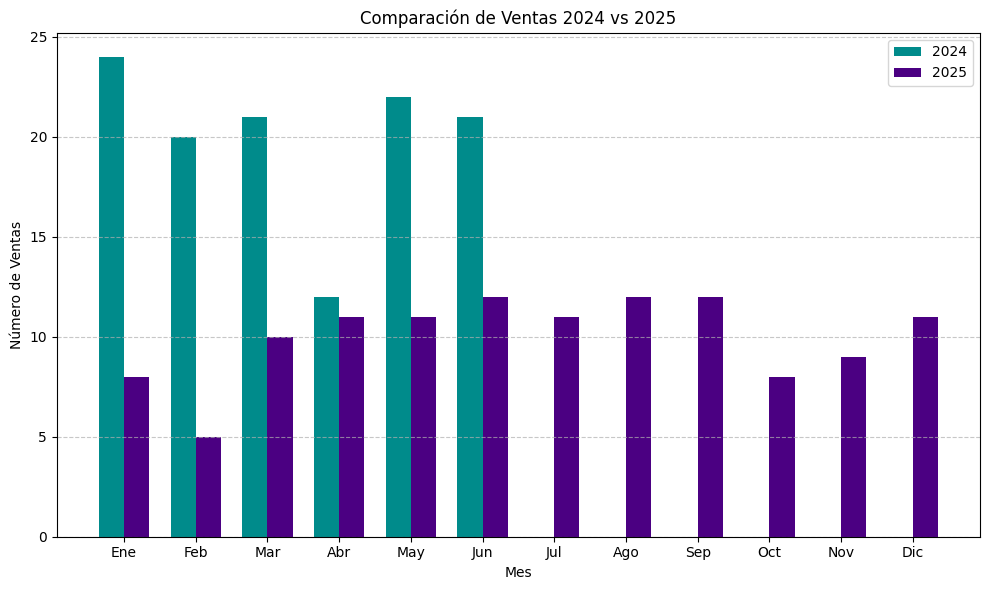

In [92]:
ventas_2024 = pd.read_excel("./data/ventas.xlsx")
ventas_2025 = ventas_2024.copy()
num_filas = len(ventas_2024['fecha'])
# Definir el rango de fechas para 2025
fecha_inicio = pd.to_datetime('2025-01-01')
fecha_fin = pd.to_datetime('2025-12-31')
rango_dias = (fecha_fin - fecha_inicio).days

# Generar fechas aleatorias
# Creamos una serie de días aleatorios dentro del rango 2025
dias_aleatorios = np.random.randint(0, rango_dias + 1, size=num_filas)

# Sumamos los días aleatorios a la fecha de inicio para obtener las fechas finales
fechas_aleatorias_2025 = fecha_inicio + pd.to_timedelta(dias_aleatorios, unit='D')

# Reemplazar la columna 'Fecha' con las nuevas fechas aleatorias de 2025
ventas_2025['fecha'] = fechas_aleatorias_2025

# Mostrar el resultado (las primeras 5 filas)
print("\nDataFrame con fechas aleatorias de 2025 reemplazadas:")
print(ventas_2025.head())

# Convertir la columna 'fecha' a tipo datetime
ventas_2024["fecha"] = pd.to_datetime(ventas_2024["fecha"])
ventas_2025["fecha"] = pd.to_datetime(ventas_2025["fecha"])

# Extraer el mes de la fecha
ventas_2024["mes"] = ventas_2024["fecha"].dt.month
ventas_2025["mes"] = ventas_2025["fecha"].dt.month

# Agrupar por mes y contar ventas (o sumar montos si tienes una columna de totales)
ventas_2024_mes = ventas_2024.groupby("mes").size()
ventas_2025_mes = ventas_2025.groupby("mes").size()

# Alinear ambos años para asegurar que todos los meses estén presentes
meses = range(1, 13)
ventas_2024_mes = ventas_2024_mes.reindex(meses, fill_value=0)
ventas_2025_mes = ventas_2025_mes.reindex(meses, fill_value=0)

# Preparar datos para el gráfico
categorias = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 
              'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_2024 = ventas_2024_mes.values
ventas_2025 = ventas_2025_mes.values

x = np.arange(len(categorias))  # posiciones para cada categoría
width = 0.35  # ancho de cada barra

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, ventas_2024, width=width, label='2024', color='darkcyan')
plt.bar(x + width/2, ventas_2025, width=width, label='2025', color='indigo')

# Personalizar
plt.title("Comparación de Ventas 2024 vs 2025")
plt.xlabel("Mes")
plt.ylabel("Número de Ventas")
plt.xticks(x, categorias)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Conclusiones

1. Impulsores Clave de Ingresos y Categorías.
    * Ingresos (Importe): Los ingresos totales están impulsados por una combinación de la cantidad de productos comprados ($r = 0.60$) y el precio unitario de los mismos ($r = 0.68$).
    * Dominio de Alimentos: La categoría "Alimentos" es el generador dominante de ingresos (286 ítems vendidos vs. 57 de "Limpieza"). Esto sugiere que "Alimentos" es el pilar del negocio, mientras que "Limpieza" representa una clara oportunidad de diversificación y crecimiento.

2. Comportamiento del Cliente y Sensibilidad al Precio.
    * Sensibilidad al Precio: Se detecta una ligera sensibilidad al precio. El análisis de correlación ($r = -0.07$) indica que los clientes tienden a comprar más unidades de productos que tienen un precio unitario más bajo.
    * Volumen de Compra: El patrón de compra más habitual es llevar 2 unidades por ítem de venta, aunque el rango común se sitúa entre 2 y 4 unidades.
    * Clientes Principales: Aunque el análisis de clientes muestra una base diversificada, "Agustina Flores" y "Olivia Gómez" destacan ligeramente como las compradoras más frecuentes (ambas con un 4% del total de ítems).
    
3. Perspectivas Geográficas y Métodos de Pago.
    * Rendimiento por Ciudad: "Rio Cuarto" es la sucursal que genera mayores ingresos totales y registra la mayor cantidad de ventas (104). "Mendiolaza" es la de menor rendimiento.
    * Patrón de Métodos de Pago: Este es uno de los hallazgos más significativos:
        * A nivel general, el "Efectivo" es el método más usado (111 transacciones), seguido de cerca por el "QR" (91).
        * Sin embargo, el "QR" es el método preferido en las dos ciudades con mayores ingresos (Río Cuarto y Alta Gracia).
        * Por el contrario, el "QR" es prácticamente inexistente en las ciudades con menor rendimiento. Esto sugiere una correlación entre la adopción de pagos digitales (QR) y un mayor volumen de ingresos por sucursal.

4. Estacionalidad y Tendencias.
    * Estacionalidad de Ventas: El análisis de fecha_venta (Ene-Jun 2024) revela una fuerte estacionalidad. Se observan picos de ventas e ingresos en enero y mayo, con una caída notable en abril.
    * Adquisición de Clientes: La adquisición de los clientes analizados (fecha_alta_cliente) tuvo su auge en enero de 2023 y disminuyó progresivamente a lo largo de ese año.

5. Análisis de Productos.
    * Producto Estrella: El producto individual más vendido es el "Queso Rallado 150g" (3% de los ítems).
    * Distribución de Precios: Los precios de los productos no son uniformes; muestran una distribución bimodal, sugiriendo dos grupos principales de productos (uno de menor precio, $1500-$2000, y uno de mayor precio, $4000$).